## 캐글 데이터를 활용한 EDA & Classification 실습

In [1]:
# !kaggle datasets download uciml/pima-indians-diabetes-database
# !unzip pima-indians-diabetes-database.zip "diabetes.csv"
# !rm pima-indians-diabetes-database.zip 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("diabetes.csv")
df.shape

(768, 9)

In [4]:
# df.info()
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- 특성 공학

In [5]:
# 수치형을 범주형으로 변환

df["Pregnancies_high"] = df["Pregnancies"] > 6
# df[["Pregnancies", "Pregnancies_high"]].head()

# One-Hot-Encoding
# 수치 => 범주 => 수치
df["Age_low"] = df["Age"] < 30
df["Age_middle"] = (df["Age"] >= 30) & (df["Age"] <= 60)
df["Age_high"] = df["Age"] > 60
df[["Age", "Age_low", "Age_middle", "Age_high"]].head()

,Age,Age_low,Age_middle,Age_high
0,50,False,True,False
1,31,False,True,False
2,32,False,True,False
3,21,True,False,False
4,33,False,True,False


<Axes: xlabel='Age_high', ylabel='count'>

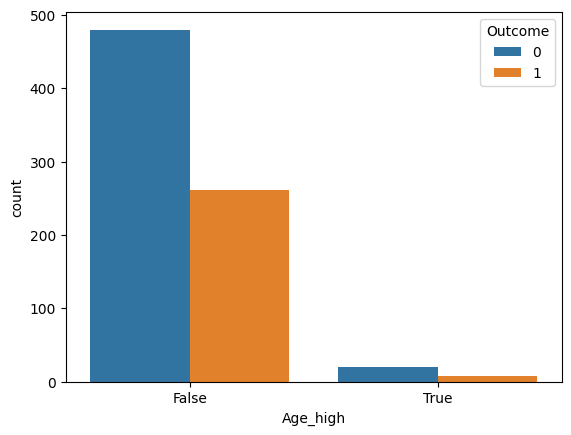

In [6]:
sns.countplot(data=df, x="Age_high", hue="Outcome")

- 결측치 확인

In [7]:
df_null = df.isnull()
df_null.sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Pregnancies_high            0
Age_low                     0
Age_middle                  0
Age_high                    0
dtype: int64

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
# min이 0인 경우, 0의 값은 결측치로 보임

df["Insulin_nan"] = df["Insulin"].replace(0, float('nan'))
df[["Insulin", "Insulin_nan"]].head()

,Insulin,Insulin_nan
0,0,NaN
1,0,NaN
2,0,NaN
3,94,94.0
4,168,168.0


In [10]:
# df["Insulin_nan"].isnull().sum()
# 결측치 비율
df["Insulin_nan"].isnull().mean()

0.4869791666666667

In [11]:
df_null_mean = df.groupby(["Outcome"])[["Insulin", "Insulin_nan"]].agg(["mean", "median"])

df_null_mean

Insulin        Insulin_nan       
               mean median        mean median
Outcome                                      
0         68.792000   39.0  130.287879  102.5
1        100.335821    0.0  206.846154  169.5

In [12]:
# Insulin_nan 중앙값으로 대체
null_median_0, null_median_1 = df_null_mean.reset_index()['Insulin_nan']['median'].tolist()
null_median_0, null_median_1

(102.5, 169.5)

In [13]:
# 결측치 채우기
df.loc[(df["Outcome"] == 0) & (df["Insulin_nan"].isnull()), "Insulin_nan"] = null_median_0#102.5
df.loc[(df["Outcome"] == 1) & (df["Insulin_nan"].isnull()), "Insulin_nan"] = null_median_1#169.5

- Scailing & Distribution

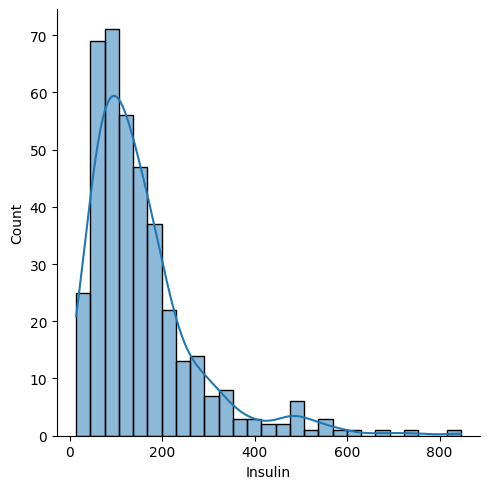

In [14]:
# sns.distplot(df.loc[df["Insulin"] > 0, "Insulin"])
# seaborn 0.11.0 이상
sns.displot(df.loc[df["Insulin"] > 0, "Insulin"], kde=True)

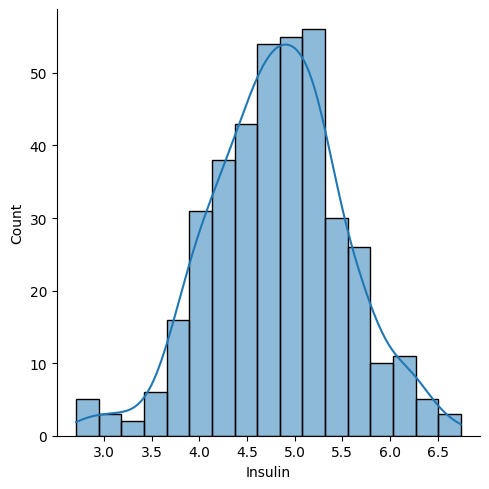

In [15]:
Insulin_log = np.log(df.loc[df["Insulin"] > 0, "Insulin"] + 1)
# sns.distplot(Insulin_log)
# seaborn 0.11.0 이상
sns.displot(Insulin_log, kde=True)

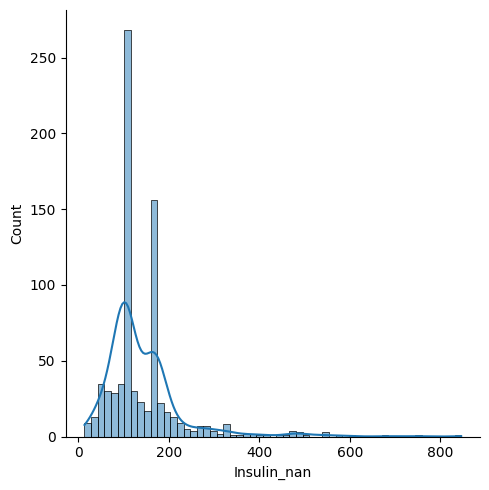

In [16]:
sns.displot(df, x="Insulin_nan", kde=True)

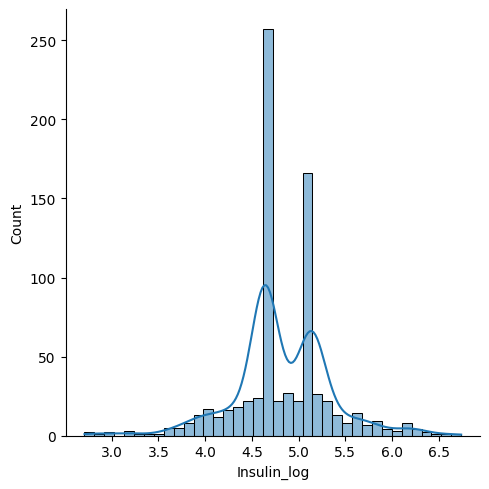

In [17]:
df["Insulin_log"] = np.log(df["Insulin_nan"] + 1)
sns.displot(df, x="Insulin_log", kde=True)

- 파생변수 생성

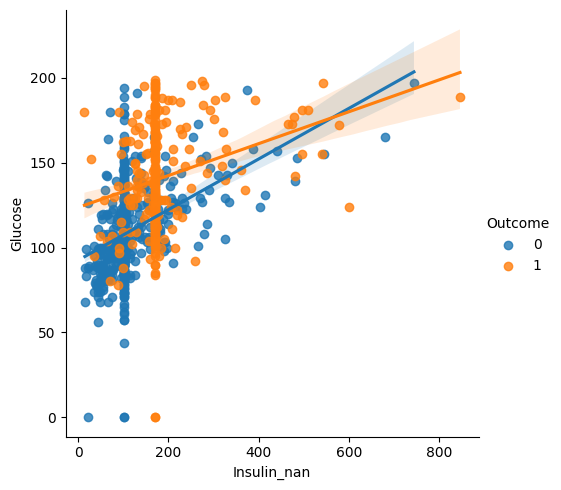

In [18]:
sns.lmplot(data=df, x="Insulin_nan", y="Glucose", hue="Outcome")

In [19]:
df["low_glu_insulin"] = (df["Glucose"] < 100) & (df["Insulin_nan"] <= 102.5)
df["low_glu_insulin"].head()

0    False
1     True
2    False
3     True
4    False
Name: low_glu_insulin, dtype: bool

In [20]:
pd.crosstab(df["Outcome"], df["low_glu_insulin"])

low_glu_insulin,False,True
Outcome,,
0,332,168
1,263,5


- 이상치 다루기

<Axes: xlabel='Insulin_nan'>

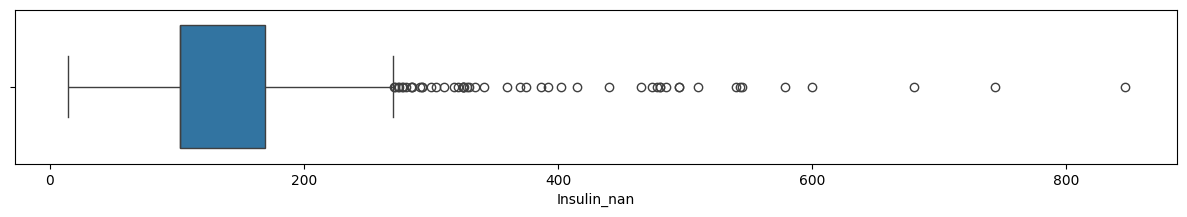

In [21]:
plt.figure(figsize=(15, 2))
sns.boxplot(data=df, x="Insulin_nan")

In [22]:
df["Insulin_nan"].describe()

count    768.000000
mean     141.753906
std       89.100847
min       14.000000
25%      102.500000
50%      102.500000
75%      169.500000
max      846.000000
Name: Insulin_nan, dtype: float64

In [23]:
IQR3 = df["Insulin_nan"].quantile(0.75)
IQR1 = df["Insulin_nan"].quantile(0.25)
IQR = IQR3 - IQR1
IQR

67.0

In [24]:
OUT = IQR3 + (IQR * 1.5)
OUT

270.0

In [25]:
df[df["Insulin_nan"] > OUT].shape, df[df["Insulin_nan"] > 600].shape

((51, 16), (3, 16))

- standard scailing

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df[["Glucose", "DiabetesPedigreeFunction"]])
scale = scaler.transform(df[["Glucose", "DiabetesPedigreeFunction"]])
scale

/opt/homebrew/anaconda3/envs/lecture/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/homebrew/anaconda3/envs/lecture/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/anaconda3/envs/lecture/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/homebrew/anaconda3/envs/lecture/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and wil

array([[ 0.84832379,  0.46849198],
       [-1.12339636, -0.36506078],
       [ 1.94372388,  0.60439732],
       ...,
       [ 0.00330087, -0.68519336],
       [ 0.1597866 , -0.37110101],
       [-0.8730192 , -0.47378505]])

In [27]:
df[["Glucose", "DiabetesPedigreeFunction"]] = scale
df[["Glucose", "DiabetesPedigreeFunction"]].head()

,Glucose,DiabetesPedigreeFunction
0,0.848324,0.468492
1,-1.123396,-0.365061
2,1.943724,0.604397
3,-0.998208,-0.920763
4,0.504055,5.484909


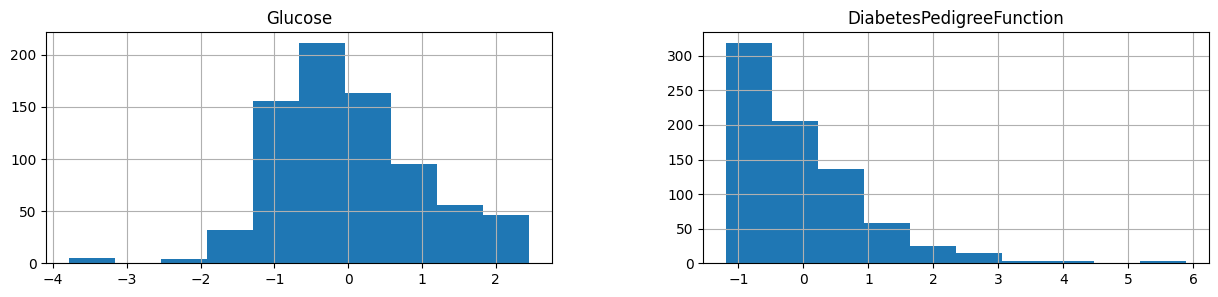

In [28]:
h = df[["Glucose", "DiabetesPedigreeFunction"]].hist(figsize=(15, 3))

In [29]:
df.to_csv("diabetes_feature.csv", index=False)

In [30]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,0.848324,72,35,0,33.6,0.468492,50,1,False,False,True,False,169.5,5.138735,False
1,1,-1.123396,66,29,0,26.6,-0.365061,31,0,False,False,True,False,102.5,4.639572,True
2,8,1.943724,64,0,0,23.3,0.604397,32,1,True,False,True,False,169.5,5.138735,False
3,1,-0.998208,66,23,94,28.1,-0.920763,21,0,False,True,False,False,94.0,4.553877,True
4,0,0.504055,40,35,168,43.1,5.484909,33,1,False,False,True,False,168.0,5.129899,False
